In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# import dataset
emp_bi = pd.read_csv('bi-employee attrition.csv', sep=';')
emp = pd.read_csv("employee attrition.csv")

In [3]:
# concat dataset from previously decoding in sql server
emp = pd.concat([emp, emp_bi['PaidFairness']], axis=1)
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PaidFairness
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Fairpaid
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Fairpaid
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Fairpaid
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Fairpaid
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Fairpaid


In [4]:
# data understanding
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# rearrange columns
emp = emp[['Department', 'EducationField', 'Age', 'Gender', 'MaritalStatus',
           'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
           'EnvironmentSatisfaction', 'HourlyRate',
           'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
           'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
           'OverTime', 'PercentSalaryHike', 'PerformanceRating',
           'RelationshipSatisfaction', 'StockOptionLevel',
           'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
           'YearsWithCurrManager', 'PaidFairness', 'Attrition']]
emp.head()

,Department,EducationField,Age,Gender,MaritalStatus,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PaidFairness,Attrition
0,Sales,Life Sciences,41,Female,Single,Travel_Rarely,1102,1,2,2,...,0,8,0,1,6,4,0,5,Fairpaid,Yes
1,Research & Development,Life Sciences,49,Male,Married,Travel_Frequently,279,8,1,3,...,1,10,3,3,10,7,1,7,Fairpaid,No
2,Research & Development,Other,37,Male,Single,Travel_Rarely,1373,2,2,4,...,0,7,3,3,0,0,0,0,Fairpaid,Yes
3,Research & Development,Life Sciences,33,Female,Married,Travel_Frequently,1392,3,4,4,...,0,8,3,3,8,7,3,0,Fairpaid,No
4,Research & Development,Medical,27,Male,Married,Travel_Rarely,591,2,1,1,...,1,6,3,3,2,2,2,2,Fairpaid,No


In [6]:
# separate between numerical and object cols
numeric_cols = []
object_cols = []

for col in emp.columns:
    if emp[col].dtype == 'int64' or emp[col].dtype == 'float64':
        numeric_cols.append(col)
    elif emp[col].dtype == 'object':
        object_cols.append(col)

# print hasilnya yang disimpan pada masing-masing feature
print(f'Total Numeric Columns : {len(numeric_cols)}')
print(f'Total Object Columns  : {len(object_cols)}')

Total Numeric Columns : 23
Total Object Columns  : 9


In [7]:
# glimpse object cols
emp[object_cols].head()

,Department,EducationField,Gender,MaritalStatus,BusinessTravel,JobRole,OverTime,PaidFairness,Attrition
0,Sales,Life Sciences,Female,Single,Travel_Rarely,Sales Executive,Yes,Fairpaid,Yes
1,Research & Development,Life Sciences,Male,Married,Travel_Frequently,Research Scientist,No,Fairpaid,No
2,Research & Development,Other,Male,Single,Travel_Rarely,Laboratory Technician,Yes,Fairpaid,Yes
3,Research & Development,Life Sciences,Female,Married,Travel_Frequently,Research Scientist,Yes,Fairpaid,No
4,Research & Development,Medical,Male,Married,Travel_Rarely,Laboratory Technician,No,Fairpaid,No


In [8]:
# glimpse numerical cols
emp[numeric_cols].head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [9]:
# desc. stats on numerical cols
emp[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [10]:
# desc. stats on obj cols
emp[object_cols].describe().T

,count,unique,top,freq
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
MaritalStatus,1470,3,Married,673
BusinessTravel,1470,3,Travel_Rarely,1043
JobRole,1470,9,Sales Executive,326
OverTime,1470,2,No,1054
PaidFairness,1470,3,Fairpaid,1371
Attrition,1470,2,No,1233


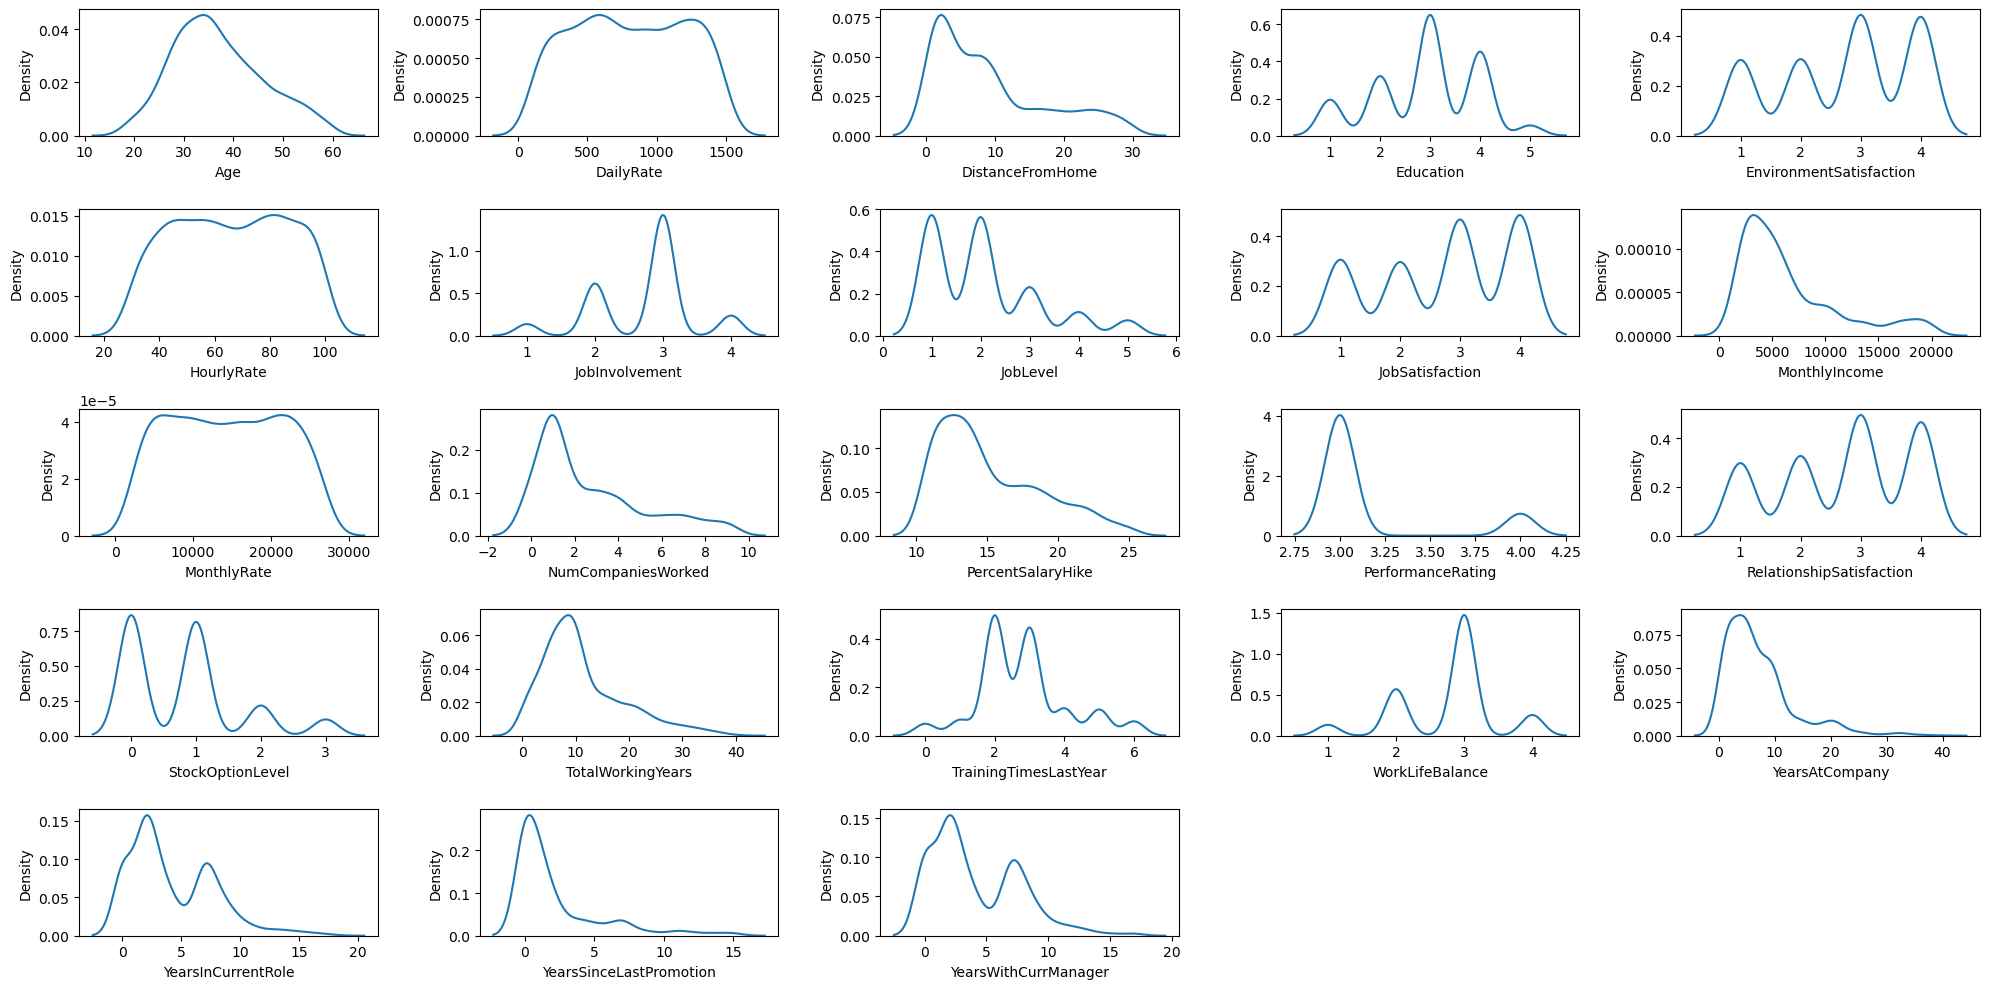

In [11]:
# distribution on numerical cols using kde plots
plt.figure(figsize=(20, 10))
for i in range(0, len(numeric_cols)):
    plt.subplot(5, 5, i + 1)
    sns.kdeplot(emp[numeric_cols[i]])
    plt.tight_layout()

plt.show()

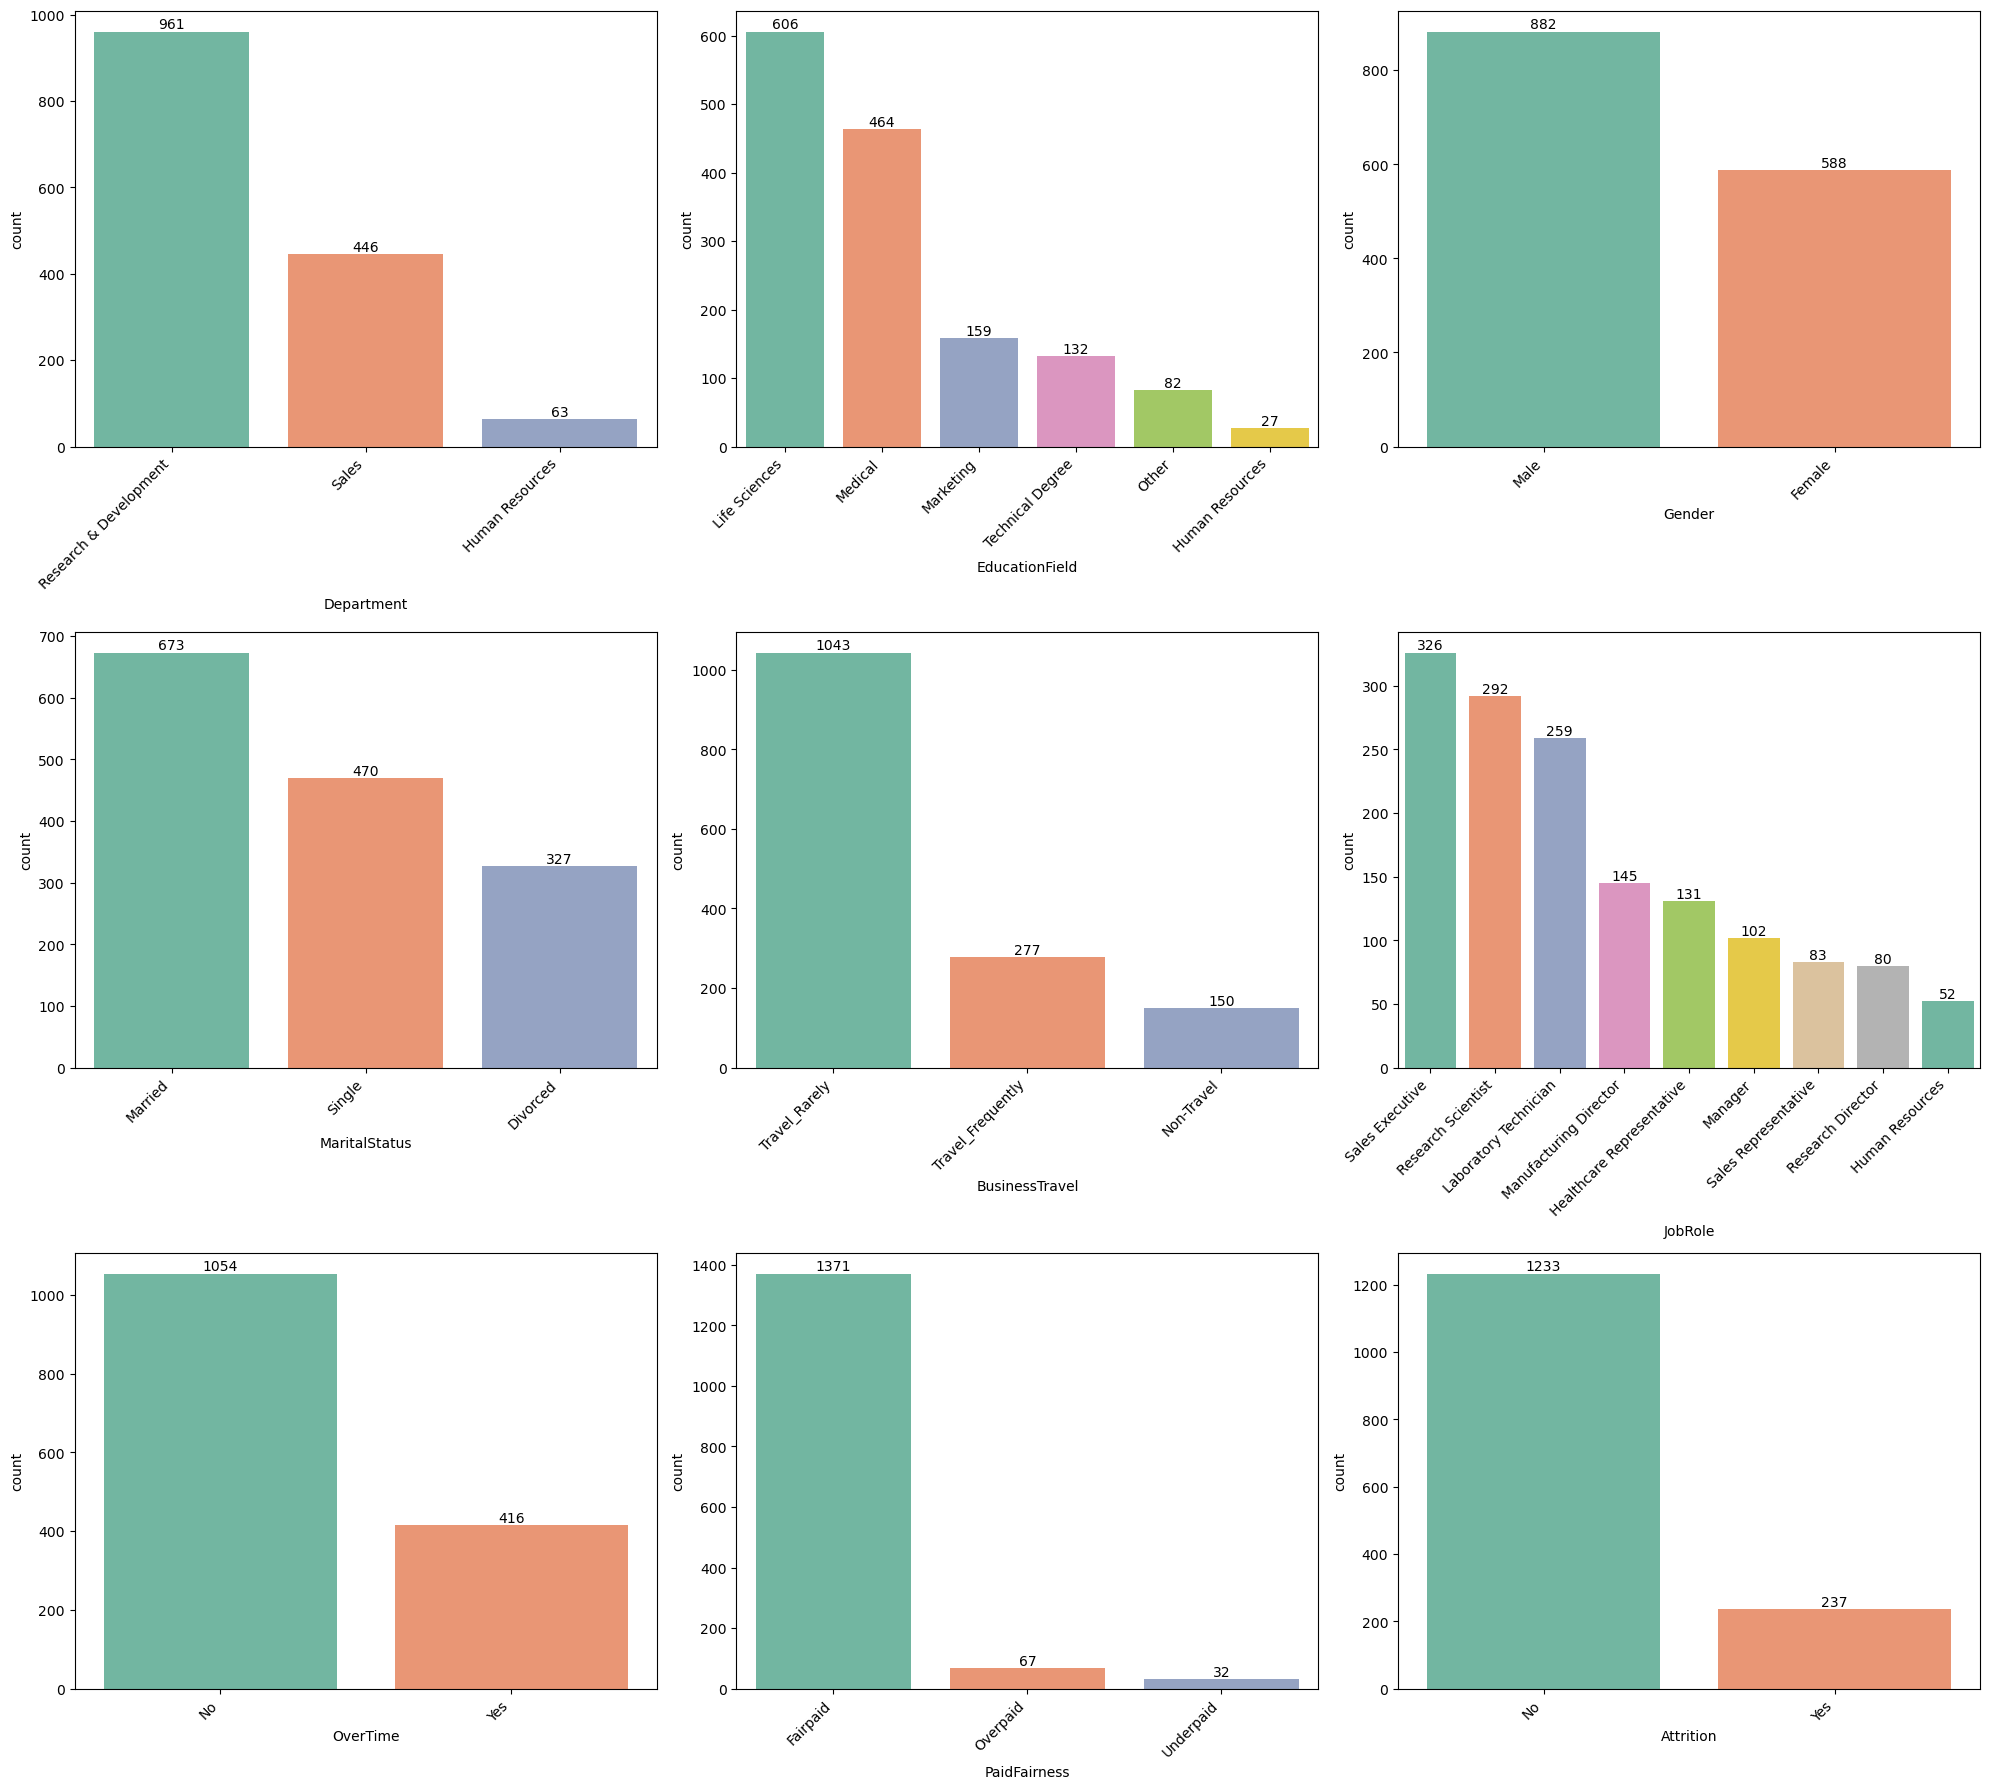

In [12]:
# barplot/countplot on obj cols
plt.figure(figsize=(20, 18))
for i in range(0, len(object_cols)):
    
    order = emp[object_cols[i]].value_counts().index
    plt.subplot(3, 3, i + 1)
    ax = sns.countplot(x=emp[object_cols[i]],
                       order=order, palette=sns.color_palette('Set2'))

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [13]:
# label encoding target
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
emp['Attrition'] = le.fit_transform(emp['Attrition'])
emp['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [14]:
# label encoding feature
le_features = LabelEncoder()
for col in ['Gender','OverTime']:
    emp[col] = le_features.fit_transform(emp[col])

emp[['Gender','OverTime']].head()

,Gender,OverTime
0,0,1
1,1,0
2,1,1
3,0,1
4,1,0


In [15]:
# one-hot encoding feature
columns_to_encode = ['Department', 'EducationField', 'MaritalStatus', 'BusinessTravel', 'JobRole', 'PaidFairness']
emp = pd.get_dummies(data=emp, columns=columns_to_encode, drop_first=True)
emp.head()

,Age,Gender,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,PaidFairness_Overpaid,PaidFairness_Underpaid
0,41,0,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,0,1,0,0,0
1,49,1,279,8,1,3,61,2,2,2,...,0,0,0,0,0,1,0,0,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,1,0,0,0,0,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,0,1,0,0,0,0
4,27,1,591,2,1,1,40,3,1,2,...,0,1,0,0,0,0,0,0,0,0


In [16]:
log_cols = ['MonthlyIncome',
            'NumCompaniesWorked',
            'TotalWorkingYears',
            'YearsAtCompany',
            'YearsSinceLastPromotion']

norm_cols = ['Age',
             'DailyRate',
             'DistanceFromHome',
             'HourlyRate',
             'JobInvolvement',
             'MonthlyRate',
             'OverTime',
             'PercentSalaryHike',
             'StockOptionLevel',
             'TrainingTimesLastYear',
             'YearsInCurrentRole',
             'YearsWithCurrManager']

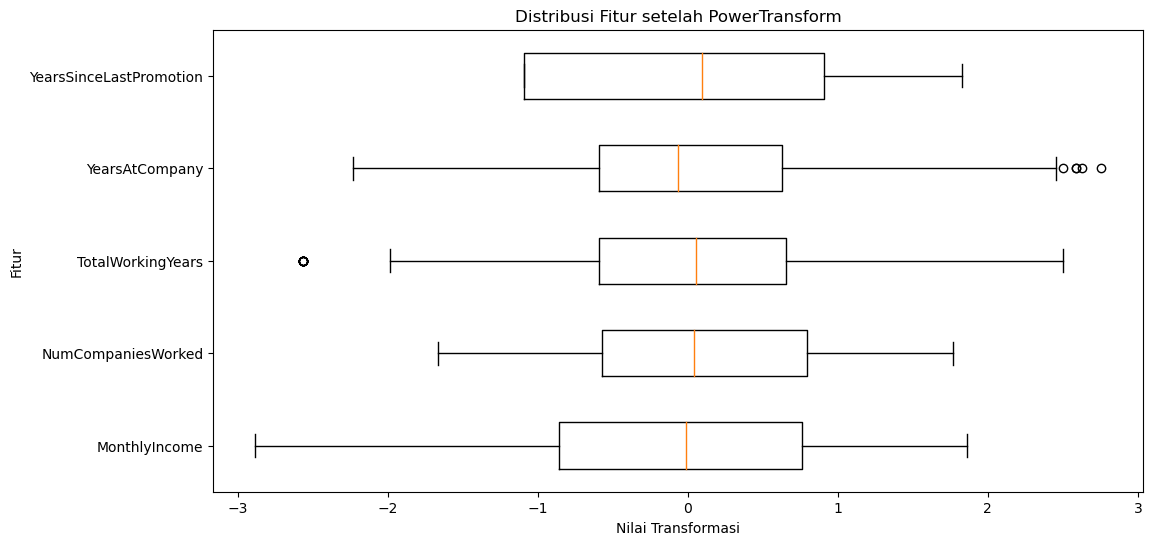

In [17]:
# menggunakan powertransformer untuk transformasi features pada log_cols
from sklearn.preprocessing import PowerTransformer

# melakukan transformasi
scaler = PowerTransformer(method='yeo-johnson')
emp[log_cols] = scaler.fit_transform(emp[log_cols])

# menampilkan distribusi fitur-fitur setelah PowerTransform
plt.figure(figsize=(12, 6))
plt.boxplot(emp[log_cols], vert=False,
            labels=emp[log_cols].columns)
plt.title('Distribusi Fitur setelah PowerTransform')
plt.xlabel('Nilai Transformasi')
plt.ylabel('Fitur')
plt.show()

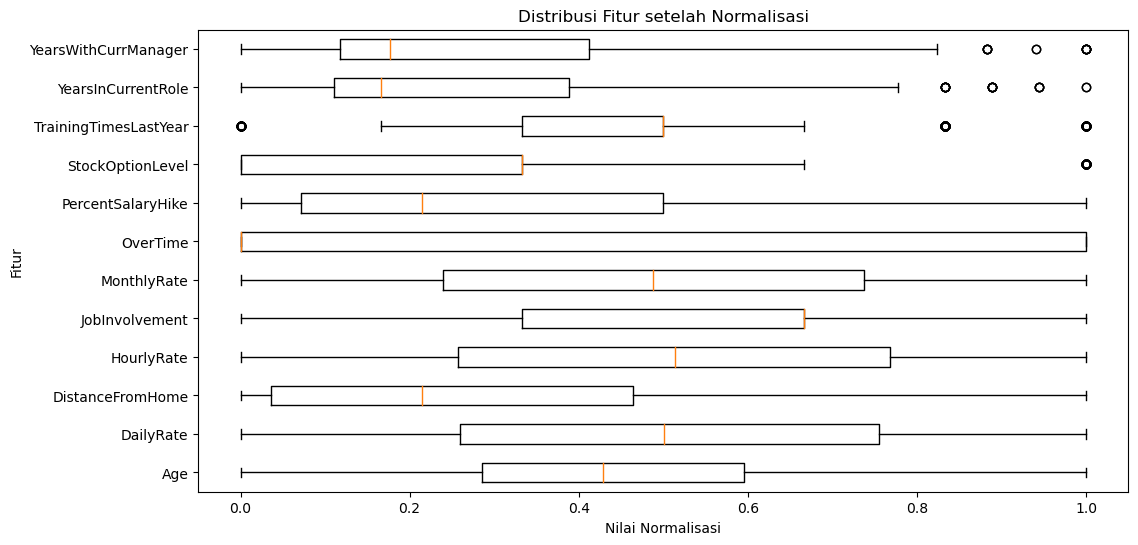

In [18]:
# menggunakan powertransformer untuk transformasi features
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
emp[norm_cols] = minmax.fit_transform(emp[norm_cols])

# menampilkan distribusi fitur-fitur setelah Normalisasi
plt.figure(figsize=(12, 6))
plt.boxplot(emp[norm_cols], vert=False,
            labels=emp[norm_cols].columns)
plt.title('Distribusi Fitur setelah Normalisasi')
plt.xlabel('Nilai Normalisasi')
plt.ylabel('Fitur')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X = emp.drop('Attrition', axis=1)
y = emp[['Attrition']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
            'JobInvolvement', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
            'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
cat_cols = ['Gender', 'Education', 'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction',
            'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 
            'Department_Research & Development', 'Department_Sales',
            'EducationField_Life Sciences', 'EducationField_Marketing',
            'EducationField_Medical', 'EducationField_Other',
            'EducationField_Technical Degree', 'MaritalStatus_Married',
            'MaritalStatus_Single', 'BusinessTravel_Travel_Frequently',
            'BusinessTravel_Travel_Rarely', 'JobRole_Human Resources',
            'JobRole_Laboratory Technician', 'JobRole_Manager',
            'JobRole_Manufacturing Director', 'JobRole_Research Director',
            'JobRole_Research Scientist', 'JobRole_Sales Executive',
            'JobRole_Sales Representative', 'PaidFairness_Overpaid',
            'PaidFairness_Underpaid']


Tabel Feature yang Dipilih:
                   Feature  F_Statistic       P_Value
4        TotalWorkingYears    58.312377  4.617527e-14
3            MonthlyIncome    56.127687  1.331684e-13
6           YearsAtCompany    50.021315  2.606745e-12
7       YearsInCurrentRole    38.222229  8.696772e-10
9     YearsWithCurrManager    30.132851  4.940496e-08
0                      Age    28.231477  1.287092e-07
2           JobInvolvement    16.499182  5.190174e-05
1         DistanceFromHome     5.435485  1.990015e-02
5    TrainingTimesLastYear     4.326792  3.773340e-02
8  YearsSinceLastPromotion     4.277382  3.884138e-02


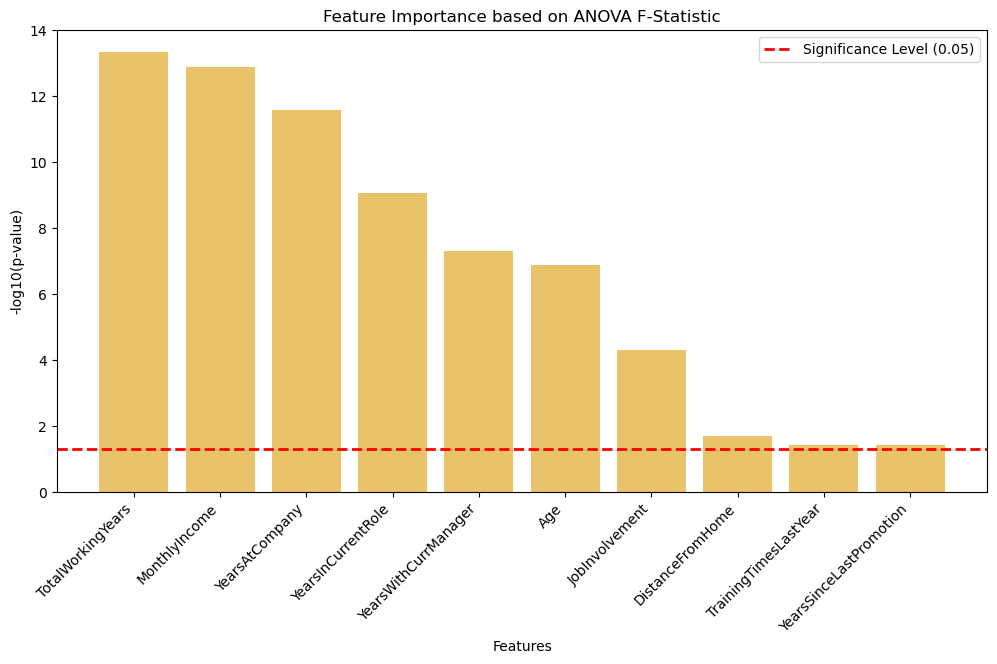

In [21]:
# melakukan features selection menggunakan f_classif (anova)
from sklearn.feature_selection import f_classif

# menghitung nilai F-statistic dan p-value untuk setiap feature
f_statistic, p_values = f_classif(X_train[num_cols], y_train)

# menentukan tingkat signifikansi (alpha)
alpha = 0.05

# memilih feature yang memiliki p-value kurang dari 0.05 (95%, tingkat signifikansi umumnya digunakan)
selected_features_indices = np.where(p_values < alpha)[0]
selected_feature_names = X_train[num_cols].columns[selected_features_indices].tolist()

# membuat DataFrame dengan informasi F-statistic dan p-value untuk fitur yang dipilih
selected_features_anova = pd.DataFrame({
    'Feature': selected_feature_names,
    'F_Statistic': f_statistic[selected_features_indices],
    'P_Value': p_values[selected_features_indices]
})
# mengurutkan DataFrame berdasarkan F-statistic secara descending
selected_features_anova = selected_features_anova.sort_values(by='F_Statistic', ascending=False)

# menampilkan feature yang dipilih beserta skor F-statistic dalam bentuk tabel
print("\nTabel Feature yang Dipilih:")
print(selected_features_anova)

# menampilkan skor dalam bentuk plot
plt.figure(figsize=(12, 6))
plt.bar(selected_features_anova['Feature'], -np.log10(selected_features_anova['P_Value']), color='#e9c369')
plt.axhline(-np.log10(alpha), color='red', linestyle='dashed', linewidth=2, label=f'Significance Level ({alpha})')
plt.title('Feature Importance based on ANOVA F-Statistic')
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [22]:
X_train_anova = X_train.loc[:, selected_feature_names]
X_test_anova = X_test.loc[:, selected_feature_names]


Tabel Feature yang Dipilih:
                             Feature  Chi_Statistic       P_Value
2                           OverTime      65.886906  4.775538e-16
6               MaritalStatus_Single      34.354702  4.592894e-09
12      JobRole_Sales Representative      32.142780  1.432480e-08
0                           JobLevel      20.906377  4.822864e-06
7   BusinessTravel_Travel_Frequently      12.048427  5.183609e-04
8      JobRole_Laboratory Technician       9.708868  1.833810e-03
11         JobRole_Research Director       9.377164  2.197052e-03
10    JobRole_Manufacturing Director       8.098787  4.429490e-03
9                    JobRole_Manager       7.820683  5.165166e-03
5              MaritalStatus_Married       6.633507  1.000780e-02
3                   Department_Sales       5.865956  1.543647e-02
1                    JobSatisfaction       5.692571  1.703688e-02
4    EducationField_Technical Degree       4.519757  3.350559e-02


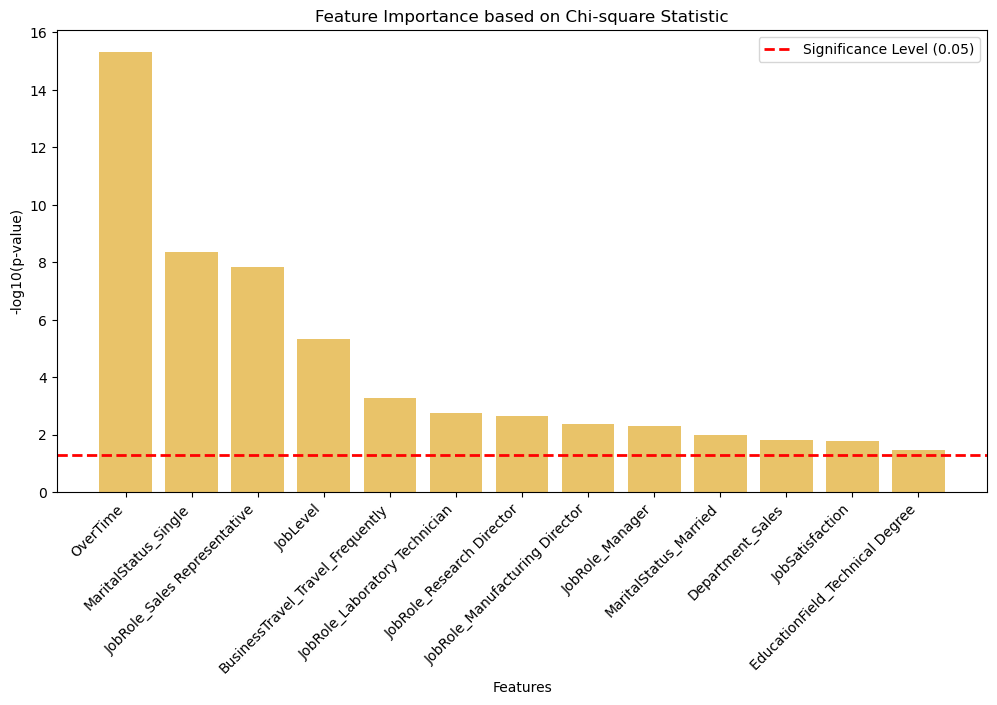

In [23]:
# melakukan features selection menggunakan chi-square test
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# menghitung chi-square statistic dan p-value untuk setiap feature
chi2_stat, p_values_chi2 = chi2(X_train[cat_cols], y_train)

# menentukan tingkat signifikansi (alpha)
alpha = 0.05

# memilih feature yang memiliki p-value kurang dari 0.05 (95% confidence level)
selected_features_chi2_indices = np.where(p_values_chi2 < alpha)[0]
selected_features_chi2_names = X_train[cat_cols].columns[selected_features_chi2_indices].tolist(
)

# membuat DataFrame dengan informasi Chi-statistic dan p-value untuk fitur yang dipilih
selected_features_chi = pd.DataFrame({
    'Feature': selected_features_chi2_names,
    'Chi_Statistic': chi2_stat[selected_features_chi2_indices],
    'P_Value': p_values_chi2[selected_features_chi2_indices]
})
# mengurutkan DataFrame berdasarkan Chi-statistic secara descending
selected_features_chi = selected_features_chi.sort_values(
    by='Chi_Statistic', ascending=False)

# menampilkan feature yang dipilih beserta skor Chi-statistic dalam bentuk tabel
print("\nTabel Feature yang Dipilih:")
print(selected_features_chi)

# menampilkan skor dalam bentuk plot
plt.figure(figsize=(12, 6))
plt.bar(selected_features_chi['Feature'], -
        np.log10(selected_features_chi['P_Value']), color='#e9c369')
plt.axhline(-np.log10(alpha), color='red', linestyle='dashed',
            linewidth=2, label=f'Significance Level ({alpha})')
plt.title('Feature Importance based on Chi-square Statistic')
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [24]:
X_train_chi2 = X_train.loc[:, selected_features_chi2_names]
X_test_chi2 = X_test.loc[:, selected_features_chi2_names]

In [25]:
# concat selected features from anova dan chi2
X_train = pd.concat([X_train_anova, X_train_chi2], axis=1)
X_test = pd.concat([X_test_anova, X_test_chi2], axis=1)

<Axes: >

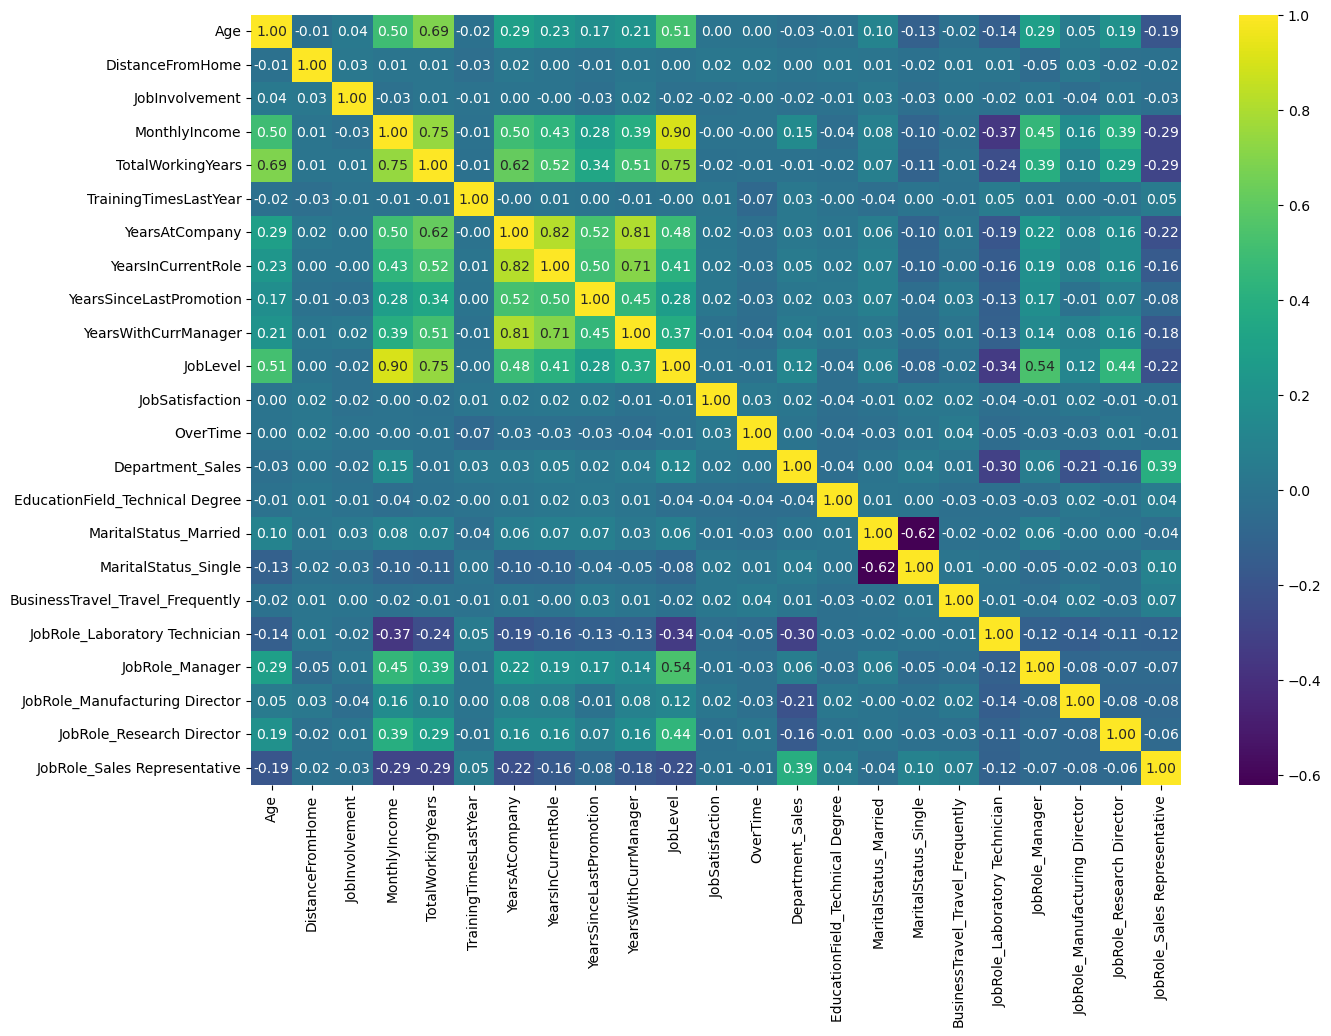

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f',cmap='viridis')

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, log_loss, precision_score, recall_score, classification_report

In [28]:
def models_accuracy(X_train, y_train, X_test, y_test):
    svc_params = {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
    dtree_params = {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 2, 'splitter': 'best'}
    xgb_params = {'max_depth': 1, 'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 1.0, 'n_estimators': 200, 'objective': 'reg:logistic', 'subsample': 0.8}
    ada_params = {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
    models = [
        LogisticRegression(random_state=42),
        SVC(**svc_params, probability=True, random_state=42),
        DecisionTreeClassifier(**dtree_params, random_state=42),
        XGBClassifier(**xgb_params, random_state=42),
        AdaBoostClassifier(**ada_params, random_state=42)
    ]

    results_list_test = []
    results_list_train = []
    results_list_diff = []
    results_list_diff_pct = []

    for model in models:
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        avg_cv_accuracy = cv_scores.mean()

        model.fit(X_train, y_train)

        # Learning Curve
        # plot_learning_curve(model, f"{type(model).__name__}", X_train, y_train, cv=5)

        # test set evaluation
        y_pred_test = model.predict(X_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        results_test = {
            "Model": type(model).__name__,
            "CV Accuracy": avg_cv_accuracy,
            "Accuracy": accuracy_test
        }
        results_list_test.append(results_test)

        # train set evaluation
        y_pred_train = model.predict(X_train)
        accuracy_train = accuracy_score(y_train, y_pred_train)

        results_train = {
            "Model": type(model).__name__,
            "Accuracy": accuracy_train
        }
        results_list_train.append(results_train)

        # diff evaluation
        results_diff = {
            "Model": type(model).__name__,
            "Accuracy_Difference": accuracy_train - accuracy_test
        }
        results_list_diff.append(results_diff)

        # diff evaluation pct
        results_diff_pct = {
            "Model": type(model).__name__,
            "Accuracy_Difference": ((accuracy_train - accuracy_test) / accuracy_train) * 100
        }
        results_list_diff_pct.append(results_diff_pct)

    # dataframe from test and test evaluation
    results_test_df = pd.DataFrame(results_list_test)
    results_test_df.set_index("Model", inplace=True)

    results_train_df = pd.DataFrame(results_list_train)
    results_train_df.set_index("Model", inplace=True)

    # dataframe evaluations diff
    results_diff_df = pd.DataFrame(results_list_diff)
    results_diff_df.set_index("Model", inplace=True)

    # dataframe evaluation diff pct
    results_diff_pct_df = pd.DataFrame(results_list_diff_pct)
    results_diff_pct_df.set_index("Model", inplace=True)

    # new df
    evaluation_df = pd.DataFrame(index=[type(model).__name__ for model in models])
    evaluation_df['CV Accuracy'] = results_test_df['CV Accuracy']
    evaluation_df['Accuracy_Train'] = results_train_df['Accuracy']
    evaluation_df['Accuracy_Test'] = results_test_df['Accuracy']
    evaluation_df['Diff'] = results_diff_df['Accuracy_Difference']
    evaluation_df['Diff (%)'] = results_diff_pct_df['Accuracy_Difference']

    return evaluation_df

In [29]:
default_accuracy = models_accuracy(X_train, y_train, X_test, y_test)
default_accuracy

,CV Accuracy,Accuracy_Train,Accuracy_Test,Diff,Diff (%)
LogisticRegression,0.869899,0.878401,0.874150,0.004252,0.484027
SVC,0.854598,0.864796,0.863946,0.000850,0.098328
DecisionTreeClassifier,0.856268,0.868197,0.863946,0.004252,0.489716
XGBClassifier,0.843549,0.905612,0.857143,0.048469,5.352113
AdaBoostClassifier,0.856300,0.897959,0.823129,0.074830,8.333333


In [30]:
# xgb
params = {'max_depth': 1, 'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 1.0,
          'n_estimators': 200, 'objective': 'reg:logistic', 'subsample': 0.8}
xgb = XGBClassifier(**params)
xgb.fit(X_train, y_train)
accuracy = accuracy_score(y_train, xgb.predict(X_train))
print('Accuracy Score : {:.2f}'.format(accuracy))

Accuracy Score : 0.91


In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(emp['Attrition'].values, xgb.predict(emp[X_test.columns].values))
print(classification_report(emp['Attrition'].values, xgb.predict(emp[X_test.columns].values)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1233
           1       0.75      0.58      0.65       237

    accuracy                           0.90      1470
   macro avg       0.84      0.77      0.80      1470
weighted avg       0.90      0.90      0.90      1470



Text(0.5, 23.52222222222222, 'Predicted Label')

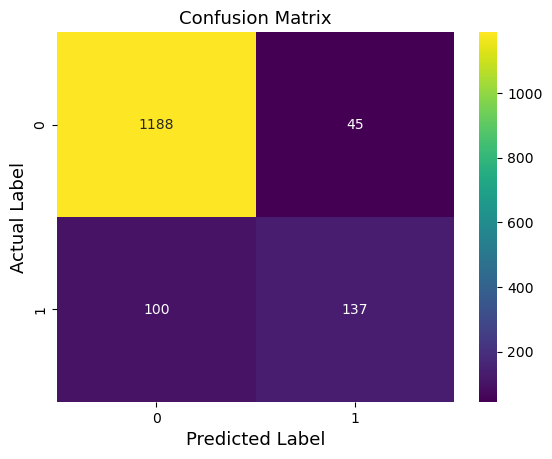

In [32]:
tn, fp, fn, tp = cm.ravel()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='viridis')
plt.title(f'Confusion Matrix', fontsize=13, color='black')
plt.ylabel('Actual Label', fontsize=13)
plt.xlabel('Predicted Label', fontsize=13)

In [33]:
emp_bi['AttritionPred'] = xgb.predict(emp[X_train.columns])
emp_bi.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Avg_Salary,StDev_Salary,LowerBoundSalary,UpperBoundSalary,PaidFairness,PercentageFairness,AttritionPred
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,4,0,5,5502,1411,2680,8324,Fairpaid,0,0
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,7,1,7,5502,1411,2680,8324,Fairpaid,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,0,0,0,2786,749,1288,4284,Fairpaid,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,7,3,0,2786,749,1288,4284,Fairpaid,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,2,2,2,2786,749,1288,4284,Fairpaid,0,0


In [34]:
emp_bi['AttritionPred'].replace({0:'No', 1:'Yes'}, inplace=True)
emp_bi['AttritionPred'].value_counts()

No     1288
Yes     182
Name: AttritionPred, dtype: int64

In [35]:
emp_bi['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [36]:
# export to csv
emp_bi.to_csv('bi-employee attrition.csv', index=False)